# Importação de drives e pacotes

In [ ]:
!pip install PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':"1mzYOcNQ4htKilBEs4uQnwKBIkk3YNauW"})   # replace the id with id of file you want to access
downloaded.GetContentFile('The Open Supernova Catalog Filtrado.csv')        # replace the file name with your file

downloaded = drive.CreateFile({'id':"1hsaoYVOvSO89Nv1wJBefKvNTK5zAXF3z"})   # replace the id with id of file you want to access
downloaded.GetContentFile('nomes_supernovas_rodrigo.csv')        # replace the file name with your file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.time import Time

# Parte 1 do projeto - Filtagem de dados

In [ ]:
catalogo = pd.read_csv("The Open Supernova Catalog Filtrado.csv")

In [ ]:
catalogo.keys()

Index(['Name', 'mmax', 'R.A.', 'Dec.', 'z', 'Type', 'Phot.'], dtype='object')

In [ ]:
# apagando as colunas que nao usaremos

catalogo = catalogo.drop(['mmax'],axis=1)
catalogo = catalogo.drop(['R.A.'],axis=1)
catalogo = catalogo.drop(['Dec.'],axis=1)
catalogo = catalogo.drop(['z'],axis=1)
catalogo = catalogo.drop(['Type'],axis=1)

catalogo.keys(), len(catalogo)

(Index(['Name', 'Phot.'], dtype='object'), 9821)

In [ ]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=ef77545f088d40c4e08472521e36fd8e2c76326227146fe7bdc90adef8f39466
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
# apagando os arquivos com problema, que estao faltando informação ou que estao corrompidos
nomes_supernovas = np.array(catalogo.Name)
nomes_supernovas = np.delete(nomes_supernovas,2)
nomes_supernovas = np.delete(nomes_supernovas,3)
nomes_supernovas = np.delete(nomes_supernovas,1589)

In [ ]:
#importando os arquivos json da web para o google drive

from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
'''
import wget
for i in range(len(nomes_supernovas)):
  print(nomes_supernovas[i],i)
  wget.download("https://sne.space/astrocats/astrocats/supernovae/output/json/"+nomes_supernovas[i]+".json")
  jsontemporario = pd.read_json(nomes_supernovas[i]+'.json')
  jsontemporario.to_json("/content/drive/My Drive/projeto_supernovas/"+nomes_supernovas[i]+".json")
drive.flush_and_unmount()
'''

Mounted at /content/drive/


'\nimport wget\nfor i in range(len(nomes_supernovas)):\n  print(nomes_supernovas[i],i)\n  wget.download("https://sne.space/astrocats/astrocats/supernovae/output/json/"+nomes_supernovas[i]+".json")\n  jsontemporario = pd.read_json(nomes_supernovas[i]+\'.json\')\n  jsontemporario.to_json("/content/drive/My Drive/projeto_supernovas/"+nomes_supernovas[i]+".json")\ndrive.flush_and_unmount()\n'

In [ ]:
#importando os arquivos .json para uma lista

listajson=[]
for i in range(len(nomes_supernovas)):
  #print(nomes_supernovas[i],i)
  listajson.append(pd.read_json("/content/drive/My Drive/projeto_supernovas/"+nomes_supernovas[i]+'.json'))

In [ ]:
tempos=[]
bandas=[]
magnitudes=[]
tipo=[]
maxmagap=[]
maxmagab=[]
tempomax=[]
ra=[]
dec=[]
z=[]

#fazendo uma lista para cada informação util no arquivo json, informações obrigatorias nao nulas são: 
#tipo, dec, ra, tempomax, magmaxap,tempo da fotometria, banda da fotometria, magnitude da fotometria

for i in range(len(listajson)):
  #print(nomes_supernovas[i],i)

  if ('claimedtype' in listajson[i][nomes_supernovas[i]].keys() and 'dec' in listajson[i][nomes_supernovas[i]].keys() and 
      'ra' in listajson[i][nomes_supernovas[i]].keys() and 'maxdate' in listajson[i][nomes_supernovas[i]].keys() and 
      'maxappmag' in listajson[i][nomes_supernovas[i]].keys() and 'time' in pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).keys() and 
      'band' in pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).keys() and 
      'magnitude' in pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).keys()):
  
    tipo.append([nomes_supernovas[i],listajson[i][nomes_supernovas[i]].claimedtype[0]['value']])
    tempomax.append([nomes_supernovas[i],Time(listajson[i][nomes_supernovas[i]].maxdate[0]['value'].replace('/','-')).mjd]) # Modified Julian Date
    dec.append([nomes_supernovas[i], listajson[i][nomes_supernovas[i]].dec[0]['value']])
    ra.append([nomes_supernovas[i], listajson[i][nomes_supernovas[i]].ra[0]['value']])    
    maxmagap.append([nomes_supernovas[i],listajson[i][nomes_supernovas[i]].maxappmag[0]['value']])


    tempos.append([nomes_supernovas[i],pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).time])
    bandas.append([nomes_supernovas[i],pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).band])
    magnitudes.append([nomes_supernovas[i],pd.DataFrame(listajson[i][nomes_supernovas[i]].photometry).magnitude])


    if 'maxabsmag' in listajson[i][nomes_supernovas[i]].keys() and 'redshift' in listajson[i][nomes_supernovas[i]].keys():
      maxmagab.append([nomes_supernovas[i],listajson[i][nomes_supernovas[i]].maxabsmag[0]['value']])
      z.append([nomes_supernovas[i], listajson[i][nomes_supernovas[i]].redshift[0]['value']])
    else:
      maxmagab.append([nomes_supernovas[i], np.nan])
      z.append([nomes_supernovas[i], np.nan])


In [ ]:
len(tempos),len(bandas),len(magnitudes),len(tipo),len(maxmagap),len(maxmagab),len(tempomax)

(7417, 7417, 7417, 7417, 7417, 7417, 7417)

In [ ]:
# deslocando cada elemento das listas de tempo em relação ao seu tempo maximo

tempos_deslocados=[]

for s in range(len(tempos)):
  if type(tempos[s][1])  == pd.core.series.Series:
    sdf=[]
    for k in range(len(tempos[s][1])):
      #print(s,k)
      if type(tempos[s][1][k]) == str:
        sdf.append(float(tempos[s][1][k]) - tempomax[s][1])
      else:
        continue
    tempos_deslocados.append([tempos[s][0] ,sdf])
  else:
    continue
len(tempos_deslocados)

7417

In [ ]:
# arredondando os tempos deslocados

for i in range(len(tempos_deslocados)):
  for j in range(len(tempos_deslocados[i][1])):
    tempos_deslocados[i][1][j] = round(tempos_deslocados[i][1][j], 0)
len(tempos_deslocados)

7417

In [ ]:
# Separando os tempos deslocados de acordo as bandas BG e U

tempos_deslocados_BG=[]
magnitudes_BG=[]
tempos_deslocados_U=[]
magnitudes_U=[]

for k in range(len(tempos_deslocados)):
  ab=[]
  cd=[]
  ef=[]
  gh=[]
  for j in range(len(tempos_deslocados[k][1])):
    if (bandas[k][1][j] == 'B' or bandas[k][1][j] == 'b' or bandas[k][1][j] == 'g' or bandas[k][1][j] == 'G' or 
        bandas[k][1][j] == "B'" or bandas[k][1][j] == "b'" or bandas[k][1][j] == "g'" or bandas[k][1][j] == "G'" or
        bandas[k][1][j] == "'B" or bandas[k][1][j] == "'b" or bandas[k][1][j] == "'g" or bandas[k][1][j] == "'G"):
      ab.append(float(tempos_deslocados[k][1][j]))
      cd.append(float(magnitudes[k][1][j]))
    if (bandas[k][1][j] == 'U' or bandas[k][1][j] == 'u' or bandas[k][1][j] == "U'" or bandas[k][1][j] == "u'" or
        bandas[k][1][j] == "'U" or bandas[k][1][j] == "'u"):
      ef.append(float(tempos_deslocados[k][1][j]))
      gh.append(float(magnitudes[k][1][j]))

  if ab != [] and cd != []:
    tempos_deslocados_BG.append([tempos_deslocados[k][0], ab])
    magnitudes_BG.append([magnitudes[k][0], cd])
  if ef != [] and gh!= []:
    tempos_deslocados_U.append([tempos_deslocados[k][0], ef])
    magnitudes_U.append([magnitudes[k][0], gh])
      
len(tempos_deslocados_BG),len(magnitudes_BG),len(tempos_deslocados_U),len(magnitudes_U)

(6059, 6059, 2106, 2106)

In [ ]:
# Separando as magnitudes da banda BG relativas aos tempos deslocados em 4 intervalos apenas, de -6 até 6 dias

magnitudesBG1=[] #lista com a média das magnitudes medidas entre -6 e -4 dias, um valor para cada supernova
magnitudesBG2=[] #lista com a média das magnitudes medidas entre -3 e 0 dias, um valor para cada supernova
magnitudesBG3=[] #lista com a média das magnitudes medidas entre 1 e 3 dias, um valor para cada supernova
magnitudesBG4=[] #lista com a média das magnitudes medidas entre 4 e 5 dias, um valor para cada supernova


for i in range(len(tempos_deslocados_BG)):
  if type(tempos_deslocados_BG[i]) == list:
    ab=[]
    cd=[]
    ef=[]
    gh=[]
    for j in range(len(tempos_deslocados_BG[i][1])):
      if tempos_deslocados_BG[i][1][j] >= -6 and tempos_deslocados_BG[i][1][j] <= -4:  #todos os decimais de -6, -5 e -4
        ab.append(magnitudes_BG[i][1][j])
      if tempos_deslocados_BG[i][1][j] >= -3 and tempos_deslocados_BG[i][1][j] <= -1:  #todos os decimais de -3, -2, -1
        cd.append(magnitudes_BG[i][1][j])
      if tempos_deslocados_BG[i][1][j] >= 0 and tempos_deslocados_BG[i][1][j] <= 3:  #todos os decimais de 0, 1, 2 e 3
        ef.append(magnitudes_BG[i][1][j])
      if tempos_deslocados_BG[i][1][j] >= 4 and tempos_deslocados_BG[i][1][j] <= 6:  #todos os decimais de 4, 5 e 6
        gh.append(magnitudes_BG[i][1][j])

    if ab != [] and cd != [] and ef != [] and gh != []: #apenas os valores que tem medida nos 4 intervalos de tempo
      magnitudesBG1.append([magnitudes_BG[i][0] ,np.mean(ab)]) # para cada supernova, adiciono a media das magnitudes no intervalo de tempo escolhido
      magnitudesBG2.append([magnitudes_BG[i][0] ,np.mean(cd)])
      magnitudesBG3.append([magnitudes_BG[i][0] ,np.mean(ef)])
      magnitudesBG4.append([magnitudes_BG[i][0] ,np.mean(gh)])   


#criando uma lista em que cada elemento é uma lista de 4 valores das magnitudes acima (1 para cada intervalo de tempo)
mags_reduzidas_BG=[]
for k in range(len(magnitudesBG1)):
  mags_reduzidas_BG.append([magnitudesBG1[k][0],magnitudesBG1[k][1],magnitudesBG2[k][1],magnitudesBG3[k][1],magnitudesBG4[k][1]])

len(magnitudesBG1),len(magnitudesBG2),len(magnitudesBG3),len(magnitudesBG4),len(mags_reduzidas_BG)

(562, 562, 562, 562, 562)

In [ ]:
# Mesmo processo feito para a banda BG, agora para a banda U

# Separando as magnitudes da banda U relativas aos tempos deslocados em 4 intervalos apenas, de -6 até 6 dias

magnitudesU1=[] #lista com a média das magnitudes medidas entre -6 e -4 dias, um valor para cada supernova
magnitudesU2=[] #lista com a média das magnitudes medidas entre -3 e 0 dias, um valor para cada supernova
magnitudesU3=[] #lista com a média das magnitudes medidas entre 1 e 3 dias, um valor para cada supernova
magnitudesU4=[] #lista com a média das magnitudes medidas entre 4 e 5 dias, um valor para cada supernova


for i in range(len(tempos_deslocados_U)):
  if type(tempos_deslocados_U[i]) == list:
    ab=[]
    cd=[]
    ef=[]
    gh=[]
    for j in range(len(tempos_deslocados_U[i][1])):
      if tempos_deslocados_U[i][1][j] >= -6 and tempos_deslocados_U[i][1][j] <= -4:  #todos os decimais de -6, -5 e -4
        ab.append(magnitudes_U[i][1][j])
      if tempos_deslocados_U[i][1][j] >= -3 and tempos_deslocados_U[i][1][j] <= -1:  #todos os decimais de -3, -2, -1
        cd.append(magnitudes_U[i][1][j])
      if tempos_deslocados_U[i][1][j] >= 0 and tempos_deslocados_U[i][1][j] <= 3:  #todos os decimais de 0, 1, 2 e 3
        ef.append(magnitudes_U[i][1][j])
      if tempos_deslocados_U[i][1][j] >= 4 and tempos_deslocados_U[i][1][j] <= 6:  #todos os decimais de 4, 5 e 6
        gh.append(magnitudes_U[i][1][j])

    if ab != [] and cd != [] and ef != [] and gh != []: #apenas os valores que tem medida nos 4 intervalos de tempo
      magnitudesU1.append([magnitudes_U[i][0] ,np.mean(ab)]) # para cada supernova, adiciono a media das magnitudes no intervalo de tempo escolhido
      magnitudesU2.append([magnitudes_U[i][0] ,np.mean(cd)])
      magnitudesU3.append([magnitudes_U[i][0] ,np.mean(ef)])
      magnitudesU4.append([magnitudes_U[i][0] ,np.mean(gh)])   


#criando uma lista em que cada elemento é uma lista de 4 valores das magnitudes acima (1 para cada intervalo de tempo)
mags_reduzidas_U=[]
for k in range(len(magnitudesU1)):
  mags_reduzidas_U.append([magnitudesU1[k][0],magnitudesU1[k][1],magnitudesU2[k][1],magnitudesU3[k][1],magnitudesU4[k][1]])

len(magnitudesU1),len(magnitudesU2),len(magnitudesU3),len(magnitudesU4),len(mags_reduzidas_U)

(365, 365, 365, 365, 365)

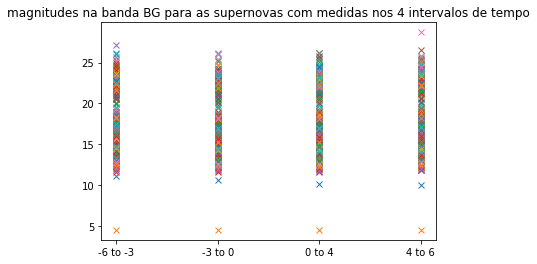

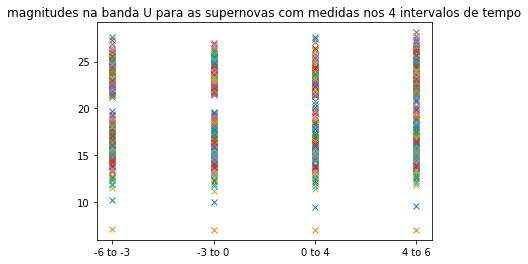

In [ ]:
temposplot = ['-6 to -3', '-3 to 0', '0 to 4', '4 to 6']
for i in range(len(mags_reduzidas_BG)):
  plt.plot(temposplot,mags_reduzidas_BG[i][1:5],'x')
plt.title('magnitudes na banda BG para as supernovas com medidas nos 4 intervalos de tempo')
plt.show()

for i in range(len(mags_reduzidas_U)):
  plt.plot(temposplot,mags_reduzidas_U[i][1:5],'x')
plt.title('magnitudes na banda U para as supernovas com medidas nos 4 intervalos de tempo')
plt.show()

In [ ]:
# escalonando as magnitudes

mags_escalonadas_BG=[]

for k in range(len(maxmagap)):
  for i in range(len(mags_reduzidas_BG)):
    esc1=[]
    for j in range(1,5):
      if mags_reduzidas_BG[i][0] == maxmagap[k][0]:
        esc1.append(mags_reduzidas_BG[i][j] / float(maxmagap[k][1]))
    if esc1 not in mags_escalonadas_BG and esc1 != []:
      mags_escalonadas_BG.append([mags_reduzidas_BG[i][0],esc1])


mags_escalonadas_U=[]
for k in range(len(maxmagap)):
  for i in range(len(mags_reduzidas_U)):
    esc2=[]
    for j in range(1,5):
      if mags_reduzidas_U[i][0] == maxmagap[k][0]:
        esc2.append(mags_reduzidas_U[i][j] / float(maxmagap[k][1]))
    if esc2 not in mags_escalonadas_U and esc2 != []:
      mags_escalonadas_U.append([mags_reduzidas_U[i][0],esc2])

len(mags_reduzidas_BG),len(mags_escalonadas_BG),len(mags_reduzidas_U), len(mags_escalonadas_U)

(562, 562, 365, 365)

In [ ]:
# nomes das supernovas tem em comum na banda BG e U
nomes_BG_U=[]
for i in range(len(mags_reduzidas_BG)):
  for j in range(len(mags_reduzidas_U)):
    if mags_reduzidas_BG[i][0] == mags_reduzidas_U[j][0]:
      nomes_BG_U.append(mags_reduzidas_BG[i][0])
      #print(mags_reduzidas_BG[i][0])
len(nomes_BG_U)

349

In [ ]:
# apagando as supernovas que nao estao em ambas listas
mags_BG=[]
for i in range(len(mags_escalonadas_BG)):
  for j in range(len(nomes_BG_U)):
    if mags_escalonadas_BG[i][0] in nomes_BG_U[j] and mags_escalonadas_BG[i] not in mags_BG:
      mags_BG.append(mags_escalonadas_BG[i])

mags_U=[]
for i in range(len(mags_escalonadas_U)):
  for j in range(len(nomes_BG_U)):
    if mags_escalonadas_U[i][0] in nomes_BG_U[j] and mags_escalonadas_U[i] not in mags_U:
      mags_U.append(mags_escalonadas_U[i])

len(mags_escalonadas_BG),len(mags_escalonadas_U),len(mags_BG),len(mags_U)

(562, 365, 349, 349)

In [ ]:
# organizando esses dois conjuntos de magnitudes alfabeticamente de acordo com o nome da supernova
mags_BG = pd.DataFrame(mags_BG).sort_values(0)
mags_U = pd.DataFrame(mags_U).sort_values(0)

In [ ]:
# filtando a lista de tipos para ficar apenas com as supernovas que tem magnitude nas duas bandas
tipo_sel=[]
for i in range(len(tipo)):
  for j in range(len(nomes_BG_U)):
    if nomes_BG_U[j] in tipo[i][0] and tipo[i][0] in nomes_BG_U[j] and nomes_BG_U[j] not in tipo_sel and tipo[i] != []:
      tipo_sel.append(tipo[i])

len(tipo),len(tipo_sel)

(7417, 349)

In [ ]:
# organizando o tipo de acordo com o nome das supernovas em ordem alfabetica

tipos = pd.DataFrame(tipo_sel).sort_values(0)

In [ ]:
# adicionando todas essas informações à um dataframe

catalogo_novo = []
catalogo_novo = pd.DataFrame(catalogo_novo)

catalogo_novo = pd.concat([catalogo_novo, tipos], axis=1)
catalogo_novo = catalogo_novo.rename(columns={0: 'nomes', 1:'tipos'})

catalogo_novo = pd.concat([catalogo_novo, mags_BG], axis=1)
catalogo_novo = catalogo_novo.rename(columns={1: 'mags_BG'})

catalogo_novo = pd.concat([catalogo_novo, mags_U], axis=1)
catalogo_novo = catalogo_novo.rename(columns={1: 'mags_U'})

# apagando as colunas extras com nomes e reiniciando os indices
catalogo_novo = catalogo_novo.drop([0],axis=1)
catalogo_novo = catalogo_novo.reset_index()
catalogo_novo = catalogo_novo.drop(['index'],axis=1)

catalogo_novo

,nomes,tipos,mags_BG,mags_U
0,ASASSN-14bd,Ia,"[1.0581521739130435, 1.0472826086956522, 1.040...","[1.0342995169082128, 1.0030797101449276, 1.000..."
1,ASASSN-14lp,Ia,"[1.0316010058675609, 1.0209555741827325, 1.026...","[1.0556747694886839, 1.0808885163453479, 1.058..."
2,CSS140914:010107-101840,Ia,"[1.272233932630709, 1.0623372597644143, 1.0401...","[1.0595784252944824, 1.018908865468072, 1.0015..."
3,Gaia15agh,Ia,"[1.0230995875073658, 1.0285346690237676, 1.036...","[1.092737183264585, 1.1154213317619328, 1.1330..."
4,LSQ11ot,Ia,"[1.0351217228464418, 1.0366783707865168, 1.046...","[1.0843258426966293, 1.076505617977528, 1.0995..."
...,...,...,...,...
344,SN2016coi,Ic BL,"[1.0903841387856257, 1.0918066914498143, 1.090...","[1.0925898389095414, 1.1158736059479555, 1.139..."
345,SN2017egm,SLSN-I,"[1.1579420556714561, 1.1439178943069561, 1.137...","[1.0519683411837373, 1.0421061212278988, 1.037..."
346,iPTF13dge,Ia,"[1.0671968190854872, 1.0369532803180916, 1.024...","[1.0525734481996907, 1.018316766070245, 1.0127..."
347,iPTF13ebh,Ia,"[1.0978705118411, 1.0440931372549018, 1.022496...","[1.0990641711229947, 1.0563836898395722, 1.070..."


In [ ]:
# Salvando esse dataframe em um arquivo csv no drive

from google.colab import drive
drive.mount('/content/drive')
catalogo_novo.to_csv('/content/drive/My Drive/projeto_supernovas_csv/supernovas_sharon.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#quantidade de tipos

catalogo_novo.tipos.value_counts()

II            205
Ia            106
IIb             8
Ib              6
Ic BL           5
Ic              4
Ia Pec          3
Ia-91T          2
SLSN-I          1
II Pec          1
IIn             1
II P            1
Ia-91bg         1
Ib/c            1
SLSN            1
BL-Ic           1
Ia-02cx         1
LBV to IIn      1
Name: tipos, dtype: int64